# 📊 Análise do PIB dos Municípios (2010-2021)

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Configuração do pandas para exibir todas as colunas
pd.set_option("display.max_columns", None)

# Carregar a base de dados
df = pd.read_excel("PIB dos Municípios - base de dados 2010-2021.xlsx")

# Padronizar nomes das colunas (remover quebras de linha e espaços extras)
df.columns = df.columns.str.replace("\n", " ", regex=False).str.strip()

# Visualizar as primeiras linhas
df.head()


,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,Código da Região Geográfica Imediata,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Código Concentração Urbana,Nome Concentração Urbana,Tipo Concentração Urbana,Código Arranjo Populacional,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Código da Região Rural,Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)","Valor adicionado bruto da Indústria, a preços correntes (R$ 1.000)","Valor adicionado bruto dos Serviços, a preços correntes - exceto Administração, defesa, educação e saúde públicas e seguridade social (R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, a preços correntes (R$ 1.000)","Valor adicionado bruto total, a preços correntes (R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1.000)","Produto Interno Bruto, a preços correntes (R$ 1.000)","Produto Interno Bruto per capita, a preços correntes (R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
0,2010,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,Leste Rondoniense,11006,Cacoal,110005,Cacoal,do Entorno,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,69260.391,16118.534,62496.185,93244.656,241119.767,20957.111,262076.878,10731.18,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
1,2010,1,Norte,11,RO,Rondônia,1100023,Ariquemes,NaN,1102,Leste Rondoniense,11003,Ariquemes,110002,Ariquemes,Polo,1101,Porto Velho,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Sub-Regional A,Centro Sub-Regional,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,73711.643,287138.585,494946.267,343867.731,1199664.227,165029.553,1364693.780,15103.86,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
2,2010,1,Norte,11,RO,Rondônia,1100031,Cabixi,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110006,Vilhena,do Entorno,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,24300.822,3252.506,12677.210,25170.235,65400.772,4210.342,69611.114,11033.62,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
3,2010,1,Norte,11,RO,Rondônia,1100049,Cacoal,NaN,1102,Leste Rondoniense,11006,Cacoal,110005,Cacoal,Polo,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Capital Regional C,Capital Regional,5105,Região Rural do Centro Sub-regional de Vilhena...,Região Rural de Centro Sub-regional,Sim,Não,Não,95259.203,182051.537,465447.325,298454.309,1041212.374,145281.717,1186494.091,15095.15,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
4,2010,1,Norte,11,RO,Rondônia,1100056,Cerejeiras,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110006,Vilhena,do Entorno,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro de Zona B,Centro de Zona,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,28976.415,19734.484,80724.991,63018.270,192454.160,2956

## 🔍 Nomes das colunas do DataFrame

In [2]:
df.columns

Index(['Ano', 'Código da Grande Região', 'Nome da Grande Região',
       'Código da Unidade da Federação', 'Sigla da Unidade da Federação',
       'Nome da Unidade da Federação', 'Código do Município',
       'Nome do Município', 'Região Metropolitana', 'Código da Mesorregião',
       'Nome da Mesorregião', 'Código da Microrregião', 'Nome da Microrregião',
       'Código da Região Geográfica Imediata',
       'Nome da Região Geográfica Imediata',
       'Município da Região Geográfica Imediata',
       'Código da Região Geográfica Intermediária',
       'Nome da Região Geográfica Intermediária',
       'Município da Região Geográfica Intermediária',
       'Código Concentração Urbana', 'Nome Concentração Urbana',
       'Tipo Concentração Urbana', 'Código Arranjo Populacional',
       'Nome Arranjo Populacional', 'Hierarquia Urbana',
       'Hierarquia Urbana (principais categorias)', 'Código da Região Rural',
       'Nome da Região Rural',
       'Região rural (segundo classificação d

## 📌 PIB total por Estado e Ano

In [7]:

# Agrupar PIB por estado e ano
total_por_estado_ano = df.groupby(['Sigla da Unidade da Federação', 'Ano'])[
    'Produto Interno Bruto,  a preços correntes (R$ 1.000)'
].sum().reset_index()

total_por_estado_ano.head()


,Sigla da Unidade da Federação,Ano,"Produto Interno Bruto, a preços correntes (R$ 1.000)"
0,AC,2010,8.342356e+06
1,AC,2011,8.949434e+06
2,AC,2012,1.013792e+07
3,AC,2013,1.147393e+07
4,AC,2014,1.345870e+07


## 📌 Função para calcular o PIB total de um estado

In [8]:

def calcular_pib_estado(sigla_estado):
    total = df[df["Sigla da Unidade da Federação"] == sigla_estado][
        'Produto Interno Bruto,  a preços correntes (R$ 1.000)'
    ].sum()
    return total

# Exemplo: PIB de SP, RJ e MG
for estado in ["SP", "RJ", "MG"]:
    print(f"Total do estado {estado}: {calcular_pib_estado(estado):,.0f}")


Total do estado SP: 23,619,547,698
Total do estado RJ: 8,049,871,164
Total do estado MG: 6,645,814,882


## 📊 Evolução do PIB por Estado (2010-2021)

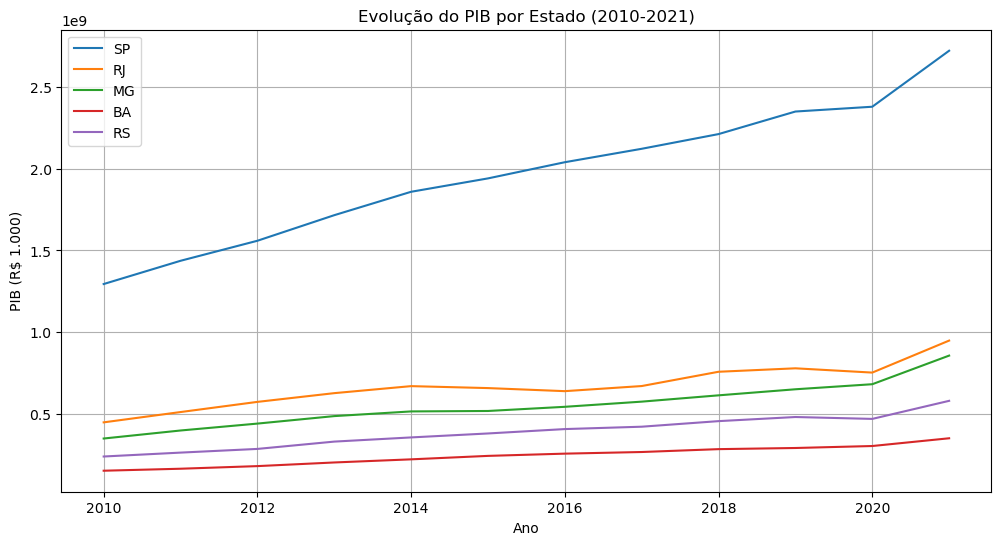

In [9]:

plt.figure(figsize=(12,6))

# Selecionar alguns estados para comparação
estados_plot = ["SP", "RJ", "MG", "BA", "RS"]

for estado in estados_plot:
    dados_estado = total_por_estado_ano[
        total_por_estado_ano["Sigla da Unidade da Federação"] == estado
    ]
    plt.plot(dados_estado["Ano"], dados_estado['Produto Interno Bruto,  a preços correntes (R$ 1.000)'], label=estado)

plt.title("Evolução do PIB por Estado (2010-2021)")
plt.xlabel("Ano")
plt.ylabel("PIB (R$ 1.000)")
plt.legend()
plt.grid(True)
plt.show()


## 📊 PIB por Região em 2021

In [10]:

# Criar dicionário de regiões
regioes = {
    "N": ["AC","AP","AM","PA","RO","RR","TO"],
    "NE": ["AL","BA","CE","MA","PB","PE","PI","RN","SE"],
    "CO": ["DF","GO","MT","MS"],
    "SE": ["SP","RJ","MG","ES"],
    "S": ["PR","RS","SC"]
}

# Mapear cada estado para sua região
df["Região"] = df["Sigla da Unidade da Federação"].map(
    {estado: regiao for regiao, estados in regioes.items() for estado in estados}
)

# PIB por região em 2021
pib_regiao_2021 = df[df["Ano"] == 2021].groupby("Região")[
    'Produto Interno Bruto,  a preços correntes (R$ 1.000)'
].sum().reset_index()

pib_regiao_2021


,Região,"Produto Interno Bruto, a preços correntes (R$ 1.000)"
0,CO,9.321656e+08
1,N,5.640637e+08
2,NE,1.243103e+09
3,S,1.559828e+09
4,SE,4.712982e+09


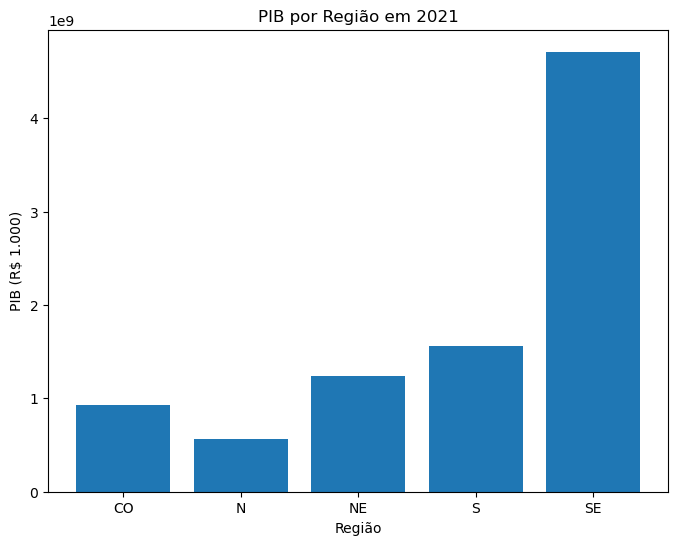

In [11]:

# Gráfico PIB por região em 2021
plt.figure(figsize=(8,6))
plt.bar(pib_regiao_2021["Região"], pib_regiao_2021['Produto Interno Bruto,  a preços correntes (R$ 1.000)'])
plt.title("PIB por Região em 2021")
plt.xlabel("Região")
plt.ylabel("PIB (R$ 1.000)")
plt.show()
